In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import re
import datetime
import nltk

Read in the hashtag list.

In [2]:
team_hashes = {}
with open('team_hashtags.txt', 'r') as f:
    for line in f:
        words = line.split()
        team = words[0].replace('-', ' ')
        hashes = words[1:]
        team_hashes[team] = hashes

Code to get all hashtags from a given tweet; function below takes a tweet and a team name (that we want that tweet to only be associated with) and checks if it contains tweets from any other team.

In [3]:
def get_hashtags(tweet):
    pattern = r'#{1}\w*'
    return re.findall(pattern, tweet)

In [4]:
def one_team_only(one_tweet, which_team):
    all_teams = team_hashes.copy()
    good = all_teams.pop(which_team)
    temp = [team_hashes[key] for key in all_teams]
    bad_teams = [item for sublist in temp for item in sublist]
    bad_teams = set(bad_teams)
    curr_hashes = set(get_hashtags(one_tweet))
    
    if len(list(curr_hashes & bad_teams)) != 0:
            return False
    return True

Read in the data for a full season, and convert the type of the datetime column.

In [5]:
s1 = pd.read_csv('2020_all_data.csv', index_col=0)
s2 = pd.read_csv('2019_all_data.csv', index_col=0)
s3 = pd.read_csv('2018_all_data.csv', index_col=0)
s4 = pd.read_csv('2017_all_data.csv', index_col=0)
full = pd.concat([s4,s3,s2,s1],axis=0)
full['Datetime'] = pd.DatetimeIndex(full['Datetime'], tz='US/Eastern')
full['Datetime'] = full['Datetime'].dt.tz_convert('UTC')
full['Home'] = np.where(full['Home'] == 'Washington Redskins', 'Washington Football Team', full['Home'])
full['Away'] = np.where(full['Away'] == 'Washington Redskins', 'Washington Football Team', full['Away'])
full['Home'] = np.where(full['Home'] == 'San Diego Chargers', 'Los Angeles Chargers', full['Home'])
full['Away'] = np.where(full['Away'] == 'San Diego Chargers', 'Los Angeles Chargers', full['Away'])
full['Home'] = np.where(full['Home'] == 'St Louis Rams', 'Los Angeles Rams', full['Home'])
full['Away'] = np.where(full['Away'] == 'St Louis Rams', 'Los Angeles Rams', full['Away'])
full['Home'] = np.where(full['Home'] == 'Oakland Raiders', 'Las Vegas Raiders', full['Home'])
full['Away'] = np.where(full['Away'] == 'Oakland Raiders', 'Las Vegas Raiders', full['Away'])

Initialize containers. Home_tweets contains all tweets related to the home teams, same for away, and corpus contains all the unique words seen.

In [6]:
home_tweets = []
away_tweets = []
corpus = {}

In [7]:
# get bigrams from the list of tweets
def count_bigrams(tweet):
    global corpus
    bigrams = nltk.bigrams(tweet.split(" "))
    for bg in bigrams:
        if bg in corpus:
            corpus[bg] += 1
        else:
            corpus[bg] = 1

Returns all valid tweets for one game, for one team. A valid tweet is one which is between the desired start and end times; has at least 10 likes; and only contains hashtags related to one team.

In [8]:
def one_game_one_team(game_time, team_name):
    start = game_time - datetime.timedelta(days=1,hours=1)
    end = game_time - datetime.timedelta(hours=1)
    date_range = " since:" + start.strftime('%Y-%m-%d') + " until:" + end.strftime('%Y-%m-%d')
    
    team_tags = " OR ".join(team_hashes[team_name])
    query = team_tags + date_range
    
    # Scrape the tweets for the date_range. Also have to filter based on the 
    # time stamp so as not to capture tweets during and after games.
    to_return = []
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
        if i > 10000:
            break
        if not (start <= tweet.date and tweet.date <= end):
            continue
        if tweet.likeCount < 10:
            continue
        if not one_team_only(tweet.content.lower(), team_name):
            continue
        tw = tweet.content.lower()
        to_return.append(tw)
        count_bigrams(tw)
    return to_return

Gets all tweets for an entire season. Uses the above helper function to get a

In [9]:
def get_season_tweets(df):
    for game in range(len(df)):
        print("Processing game number {}".format(game))
        gametime = df.iloc[game]['Datetime']
        hometeam = df.iloc[game]['Home']
        awayteam = df.iloc[game]['Away']
        
        h_tweets = one_game_one_team(gametime, hometeam)
        a_tweets = one_game_one_team(gametime, awayteam)
        
        home_tweets.append(h_tweets)
        away_tweets.append(a_tweets)
        
    return     

In [10]:
get_season_tweets(full)

Processing game number 0
Processing game number 1
Processing game number 2
Processing game number 3
Processing game number 4
Processing game number 5
Processing game number 6
Processing game number 7
Processing game number 8
Processing game number 9
Processing game number 10
Processing game number 11
Processing game number 12
Processing game number 13
Processing game number 14
Processing game number 15
Processing game number 16
Processing game number 17
Processing game number 18
Processing game number 19
Processing game number 20
Processing game number 21
Processing game number 22
Processing game number 23
Processing game number 24
Processing game number 25
Processing game number 26
Processing game number 27
Processing game number 28
Processing game number 29
Processing game number 30
Processing game number 31
Processing game number 32
Processing game number 33
Processing game number 34
Processing game number 35
Processing game number 36
Processing game number 37
Processing game number

Processing game number 308
Processing game number 309
Processing game number 310
Processing game number 311
Processing game number 312
Processing game number 313
Processing game number 314
Processing game number 315
Processing game number 316
Processing game number 317
Processing game number 318
Processing game number 319
Processing game number 320
Processing game number 321
Processing game number 322
Processing game number 323
Processing game number 324
Processing game number 325
Processing game number 326
Processing game number 327
Processing game number 328
Processing game number 329
Processing game number 330
Processing game number 331
Processing game number 332
Processing game number 333
Processing game number 334
Processing game number 335
Processing game number 336
Processing game number 337
Processing game number 338
Processing game number 339
Processing game number 340
Processing game number 341
Processing game number 342
Processing game number 343
Processing game number 344
P

Processing game number 612
Processing game number 613
Processing game number 614
Processing game number 615
Processing game number 616
Processing game number 617
Processing game number 618
Processing game number 619
Processing game number 620
Processing game number 621
Processing game number 622
Processing game number 623
Processing game number 624
Processing game number 625
Processing game number 626
Processing game number 627
Processing game number 628
Processing game number 629
Processing game number 630
Processing game number 631
Processing game number 632
Processing game number 633
Processing game number 634
Processing game number 635
Processing game number 636
Processing game number 637
Processing game number 638
Processing game number 639
Processing game number 640
Processing game number 641
Processing game number 642
Processing game number 643
Processing game number 644
Processing game number 645
Processing game number 646
Processing game number 647
Processing game number 648
P

Processing game number 916
Processing game number 917
Processing game number 918
Processing game number 919
Processing game number 920
Processing game number 921
Processing game number 922
Processing game number 923
Processing game number 924
Processing game number 925
Processing game number 926
Processing game number 927
Processing game number 928
Processing game number 929
Processing game number 930
Processing game number 931
Processing game number 932
Processing game number 933
Processing game number 934
Processing game number 935
Processing game number 936
Processing game number 937
Processing game number 938
Processing game number 939
Processing game number 940
Processing game number 941
Processing game number 942
Processing game number 943
Processing game number 944
Processing game number 945
Processing game number 946
Processing game number 947
Processing game number 948
Processing game number 949
Processing game number 950
Processing game number 951
Processing game number 952
P

In [11]:
import pickle
with open('data/pickled_tweets_corpus/4seasons_home_bigrams.pkl', 'wb') as f:
    pickle.dump(home_tweets, f)
with open('data/pickled_tweets_corpus/4seasons_away_bigrams.pkl', 'wb') as f:
    pickle.dump(away_tweets, f)
with open('data/pickled_tweets_corpus/4seasons_corpus_bigrams.pkl', 'wb') as f:
    pickle.dump(corpus, f)

Get the top 100 or top 1000 unigrams or bigrams by frequency. Call this our corpus (can be changed)

In [54]:
top_grams = [x[0] for x in sorted(corpus.items(), key=lambda x: x[1], reverse=True)[:1000]]

A function that, given a list of (valid) tweets for one game and a corpus of interest, returns a numerical version representation of the game. Each number in the return vector represents one word in the corpus, and it is computed as the number of occurrences of that word in tweets about this game, divided by the total number of tweets about this game.

In [55]:
def vectorize_list_bigrams(list_of_tweets, corpus):
    num_tweets = len(list_of_tweets)
    this_dict = {}
    for tweet in list_of_tweets:
        bigrams = nltk.bigrams(tweet.split(" "))
        for bg in bigrams:
            if bg in this_dict:
                this_dict[bg] += 1
            else:
                this_dict[bg] = 1
    to_return = []
    for key in corpus:
        num = this_dict[key]/num_tweets if key in this_dict else 0
        to_return.append(num)
    return to_return

In [56]:
vectorize_list_bigrams(home_tweets[0], [('to', 'the'), ('in', 'the')])

[0, 0]

Vectorize each home and each away game.

In [57]:
num_h_tweets = [vectorize_list_bigrams(game, top_grams) for game in home_tweets]
num_a_tweets = [vectorize_list_bigrams(game, top_grams) for game in away_tweets]

Concatenate the home and away vectors as in the papers, and use this to produce our X and Y to perform models on.

In [58]:
home_vecs = np.array(num_h_tweets)
away_vecs = np.array(num_a_tweets)
X = np.concatenate([home_vecs, away_vecs], axis=1)

In [59]:
Y = full.iloc[:,-1].values

In [60]:
X.shape

(1024, 2000)

In [61]:
Y.shape

(1024,)

In [62]:
np.save('data/preprocessed/X_1000_bi_4seasons', X)
np.save('data/preprocessed/Y_1000_bi_4seasons', Y)

In [63]:
#everything = np.concatenate([X,Y.reshape(-1,1)], axis=1)
#np.random.shuffle(everything)
#xs = everything[:,:-1]
#ys = everything[:,-1]

In [79]:
X_train = X[:768]
X_test = X[768:]
Y_train = Y[:768]
Y_test = Y[768:]

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.515625

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, Y_train)
ada.score(X_test, Y_test)

0.46484375

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, Y_train)
dt.score(X_test, Y_test)

0.56640625

[Text(320.2317485898469, 215.79272727272726, 'X[892] <= 0.018\ngini = 0.493\nsamples = 768\nvalue = [338, 430]'),
 Text(311.4188557614827, 212.49818181818182, 'X[1336] <= 0.011\ngini = 0.491\nsamples = 755\nvalue = [326, 429]'),
 Text(302.4261079774376, 209.20363636363635, 'X[801] <= 0.001\ngini = 0.488\nsamples = 734\nvalue = [309, 425]'),
 Text(293.07365028203066, 205.9090909090909, 'X[267] <= 0.022\ngini = 0.491\nsamples = 708\nvalue = [307, 401]'),
 Text(283.0017727639001, 202.61454545454546, 'X[1495] <= 0.022\ngini = 0.488\nsamples = 681\nvalue = [287, 394]'),
 Text(277.2464141821112, 199.32, 'X[1932] <= 0.014\ngini = 0.485\nsamples = 669\nvalue = [276, 393]'),
 Text(274.3687348912168, 196.02545454545455, 'X[357] <= 0.016\ngini = 0.482\nsamples = 661\nvalue = [268, 393]'),
 Text(271.49105560032234, 192.73090909090908, 'X[1301] <= 0.011\ngini = 0.486\nsamples = 643\nvalue = [268, 375]'),
 Text(262.94794520547947, 189.43636363636364, 'X[434] <= 0.004\ngini = 0.49\nsamples = 623\nval

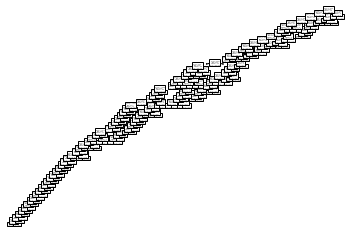

In [83]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [92]:
top_grams[301]

('i', 'hope')

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

0.5241935483870968

In [69]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, Y_train)
mlp.score(X_test, Y_test)

0.5806451612903226

In [70]:
np.count_nonzero(X_train)

97431

In [71]:
X_train.shape[0]*X_train.shape[1]

1800000

In [72]:
97000/1800000

0.05388888888888889

In [73]:
binarized_train = np.where(X_train != 0, 1, 0)
binarized_test = np.where(X_test != 0, 1, 0)

In [75]:
from sklearn.ensemble import RandomForestClassifier
dt = MLPClassifier().fit(binarized_train, Y_train)
dt.score(binarized_train, Y_train)

0.9944444444444445

In [76]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, Y_train)
gnb.score(X_test, Y_test)

0.6129032258064516

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(binarized_train, Y_train)
gnb.score(binarized_test, Y_test)

0.5241935483870968

In [78]:
gnb.score(binarized_train, Y_train)

0.7611111111111111